# Energy Efficiency

[Fuente de datos](https://archive.ics.uci.edu/dataset/242/energy+efficiency)
 
[Listado de repositorios tec](https://experiencia21.tec.mx/courses/530360/pages/evaluacion)


Las variables a predecir son las variables de Cooling Load y Heating Load. Ambas son variables continuas y representan la eficiencia energética de una construcción en función a una serie de variables asociadas a la construcción

**IMPORTACION DE LIBRERIAS**

In [31]:
import pandas as pd
import os 

## 1) Lecture de datos 

In [32]:
# Getting the root path 
path = os.getcwd()  # Obtiene el directorio actual
parent_path = os.path.dirname(path)  # Retrocede una carpeta
print(f"Directorio padre: {parent_path}")

Directorio padre: /Users/orlandoandrade/Documents/Maestria en inteligencia artificial aplicada/Materias/3 trimestre/Repositorio/Repositorio grupal/machine-learning-operations/mlops


In [33]:
dataset = pd.read_excel(io= parent_path + "/data/01_raw/ENB2012_data.xlsx")
dataset

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


**Renaming variables**

In [34]:
dataset.rename(columns={"X1": "Relative_Compactness", 
                        "X2": "Surface_Area", 
                        "X3": "Wall_Area", 
                        "X4": "Roof_Area",
                        "X5": "Overall_Height", 
                        "X6": "Orientation", 
                        "X7": "Glazing Area", 
                        "X8": "Glazing Area Distribution", 
                        "Y1": "Heating Load", 
                        "Y2": "Cooling Load"
                       }, inplace=True)

dataset.head(n=5)

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


## 2) Análisis exploratorio de datos 

### 2.1) Análisis univariable 
En esta sección se hará análisis de manera individual a cada una de las variables

#### 2.1.1) Tipo de variables en el set de datos 

In [43]:
dataset.dtypes # Podemos observar que  la mayoría de las variables son de tipo flotante. Con excepción a 2 de tipo entero que son la de Orientation y Glazing Area Distribution. 

Relative_Compactness         float64
Surface_Area                 float64
Wall_Area                    float64
Roof_Area                    float64
Overall_Height               float64
Orientation                    int64
Glazing Area                 float64
Glazing Area Distribution      int64
Heating Load                 float64
Cooling Load                 float64
dtype: object

#### 2.1.2) Estadística descriptiva general 

In [35]:
dataset.describe(include="number").T

,count,mean,std,min,25%,50%,75%,max
Relative_Compactness,768.0,0.764167,0.105777,0.62,0.6825,0.75,0.8300,0.98
Surface_Area,768.0,671.708333,88.086116,514.50,606.3750,673.75,741.1250,808.50
Wall_Area,768.0,318.500000,43.626481,245.00,294.0000,318.50,343.0000,416.50
Roof_Area,768.0,176.604167,45.165950,110.25,140.8750,183.75,220.5000,220.50
Overall_Height,768.0,5.250000,1.751140,3.50,3.5000,5.25,7.0000,7.00
Orientation,768.0,3.500000,1.118763,2.00,2.7500,3.50,4.2500,5.00
Glazing Area,768.0,0.234375,0.133221,0.00,0.1000,0.25,0.4000,0.40
Glazing Area Distribution,768.0,2.812500,1.550960,0.00,1.7500,3.00,4.0000,5.00
Heating Load,768.0,22.307195,10.090204,6.01,12.9925,18.95,31.6675,43.10
Cooling Load,768.0,24.587760,9.513306,10.90,15.6200,22.08,33.1325,48.03


#### 2.1.3) Inspección de registros nulos 

In [36]:
dataset.isnull().sum()  # No existen valores nulos 

Relative_Compactness         0
Surface_Area                 0
Wall_Area                    0
Roof_Area                    0
Overall_Height               0
Orientation                  0
Glazing Area                 0
Glazing Area Distribution    0
Heating Load                 0
Cooling Load                 0
dtype: int64

#### 2.1.4) Box plot, distribución de variables

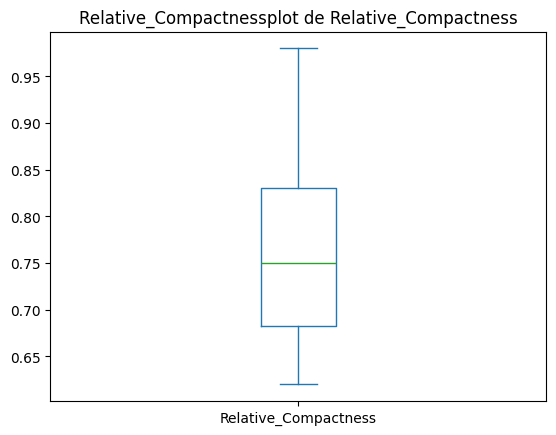

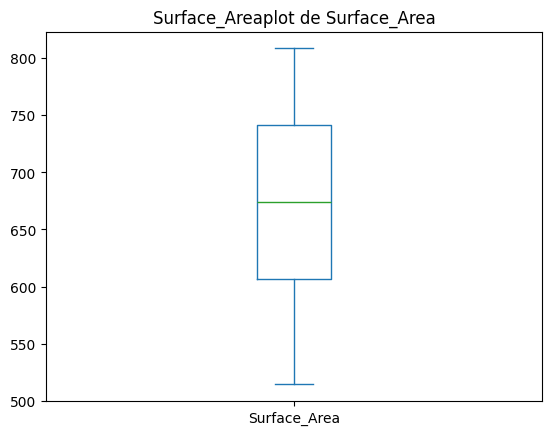

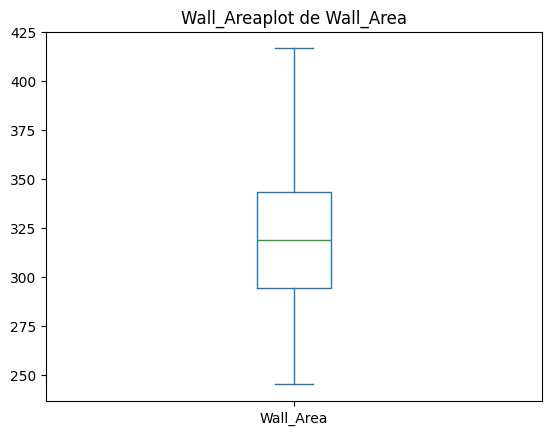

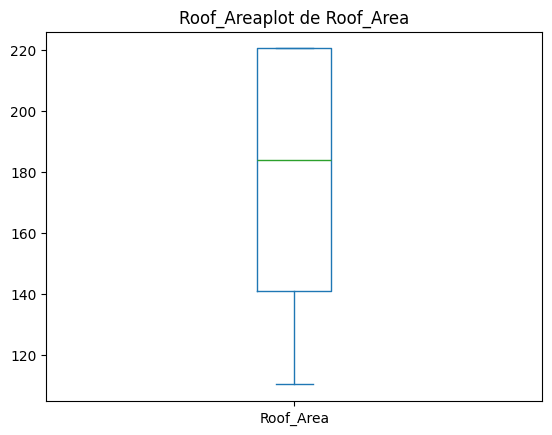

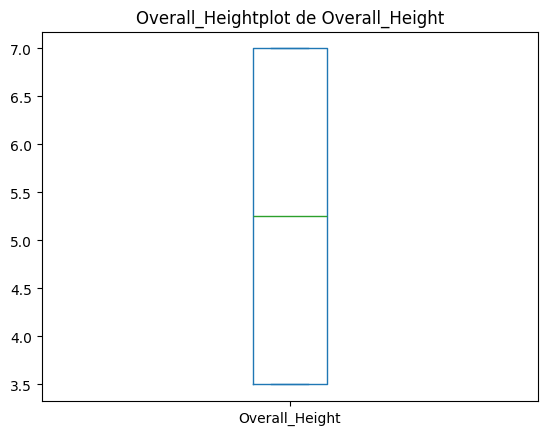

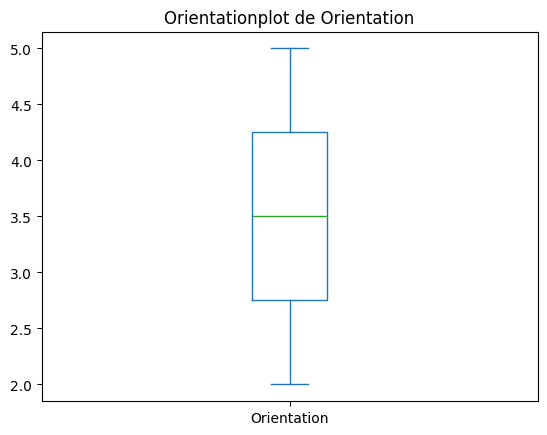

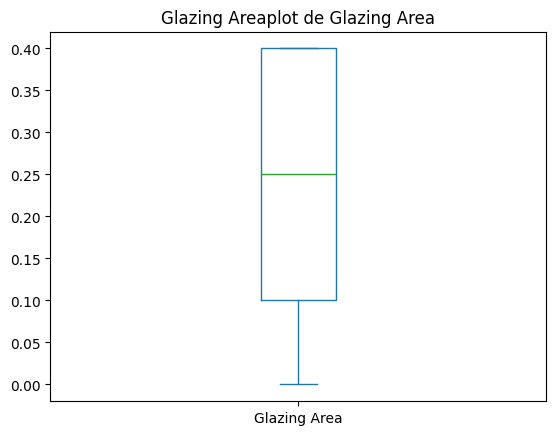

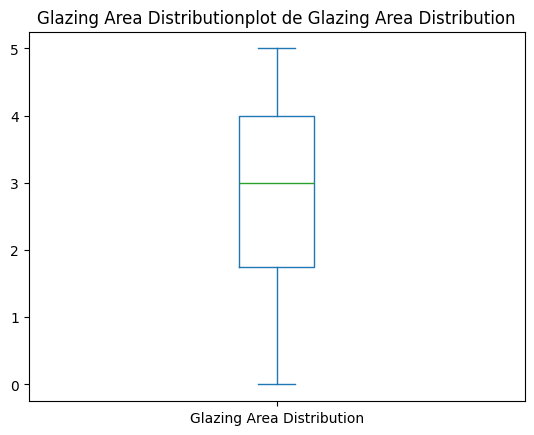

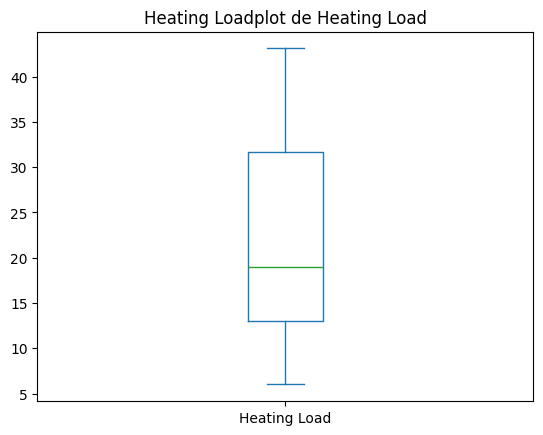

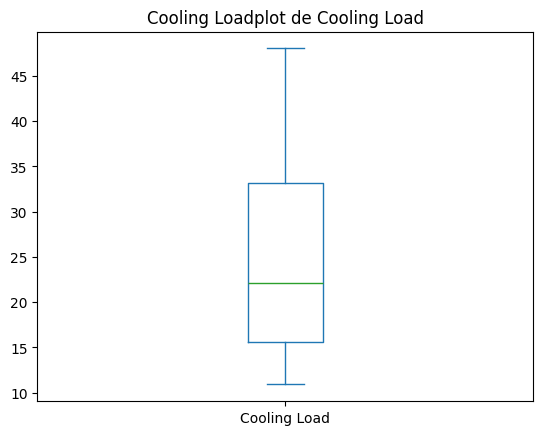

In [45]:
# 1) Definimos el nombre de las variables 
lista_columnas = list(dataset.columns)

# 2) Definimos la función donde se creará los boxplots 
def distribution_plot(dataset:pd.DataFrame, columns:list, kind:str):
    # Importación de librería necesaria
    import matplotlib.pyplot as plt

    # Inicio del ciclo de impresiones
    for i in columns:
        dataset[i].plot(kind=kind)
        plt.title(f"{i}plot de {i}")  # Agrega el título
        plt.show()  # Muestra cada gráfico de manera correcta
        
# 3) Aplicación de la función de box plot        
distribution_plot(dataset=dataset, columns=lista_columnas, kind="box")
# Agregar que se guarde cada uno de estos box plots 

#### 2.1.5) Histograma, distribución de variables 

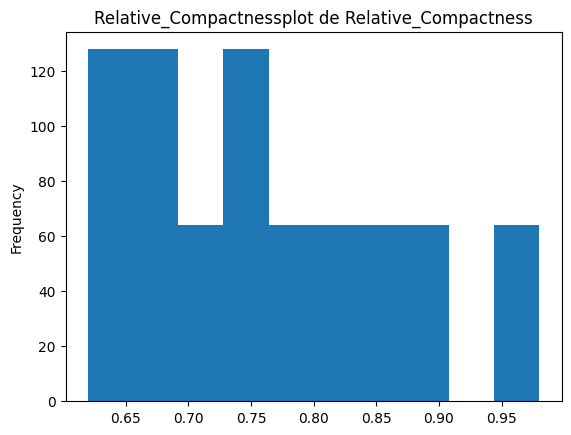

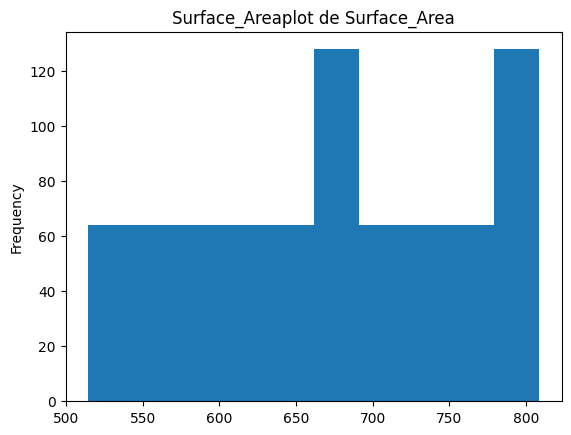

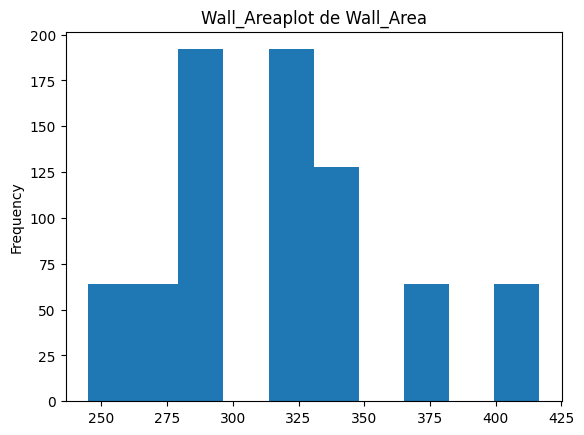

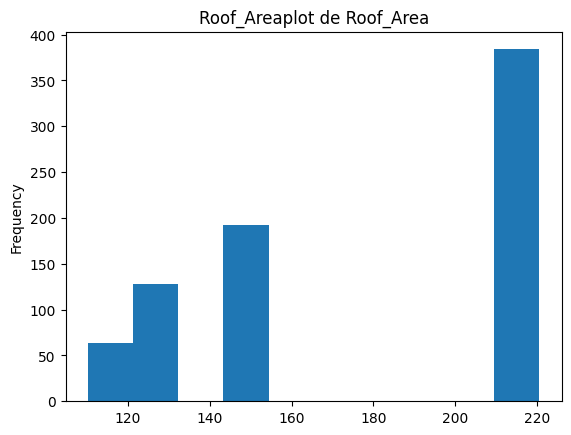

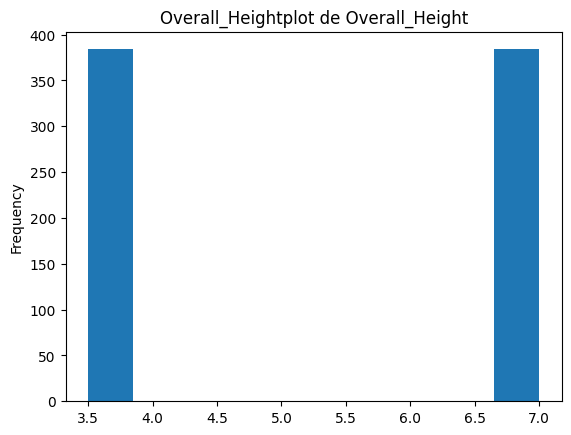

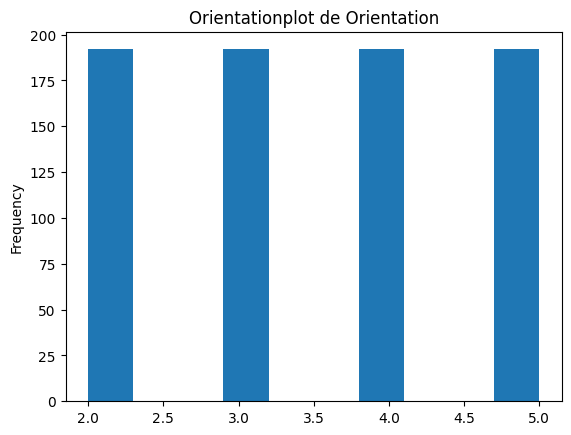

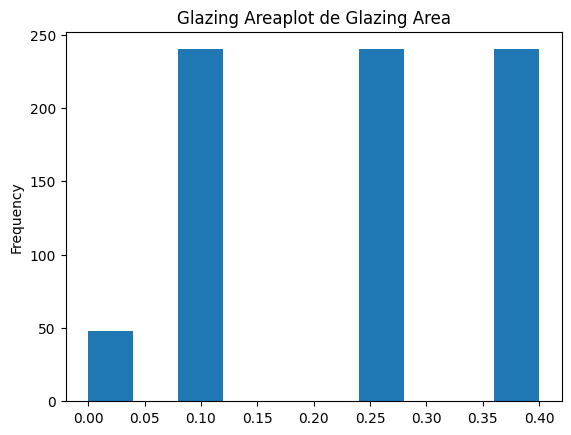

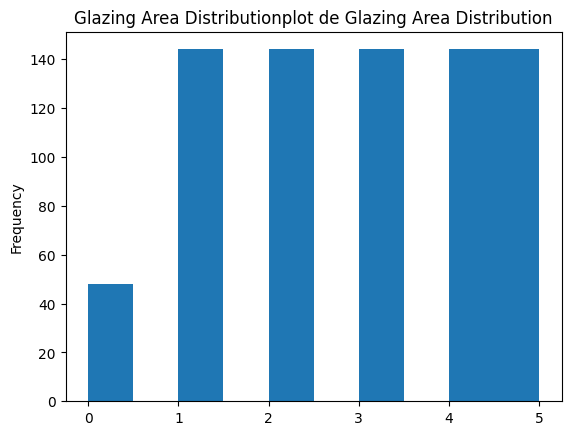

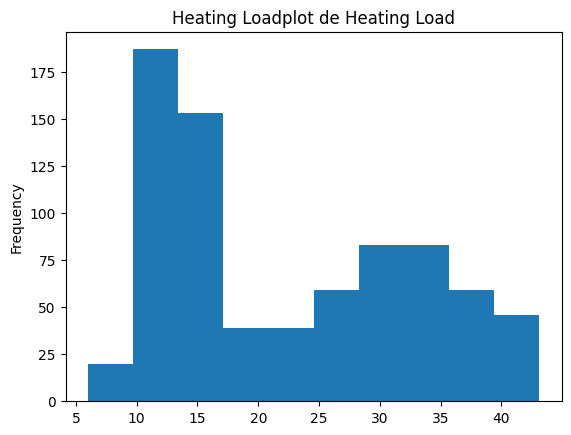

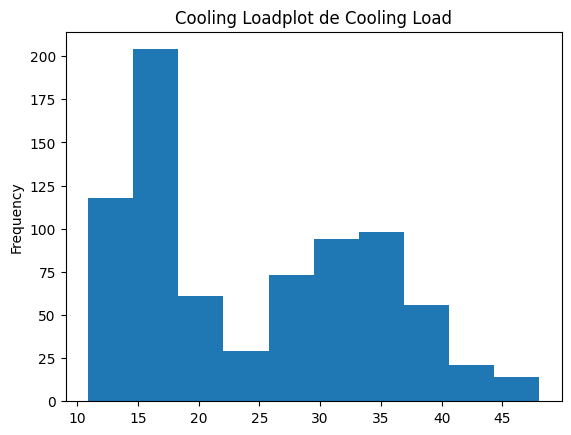

In [46]:
distribution_plot(dataset=dataset, columns=lista_columnas, kind="hist")

### 2.3) Análisis bivariante 
En esta sección se va a analizar relaciones entre 2 variables. Se hará un especial enfasis a la relación que tiene las variables objetivo con las features 

In [ ]:
### AQUI VOY !!! 



### 2.3) Correlación entre variables 
En este caso vamos a utilizar la correlación de pearson 

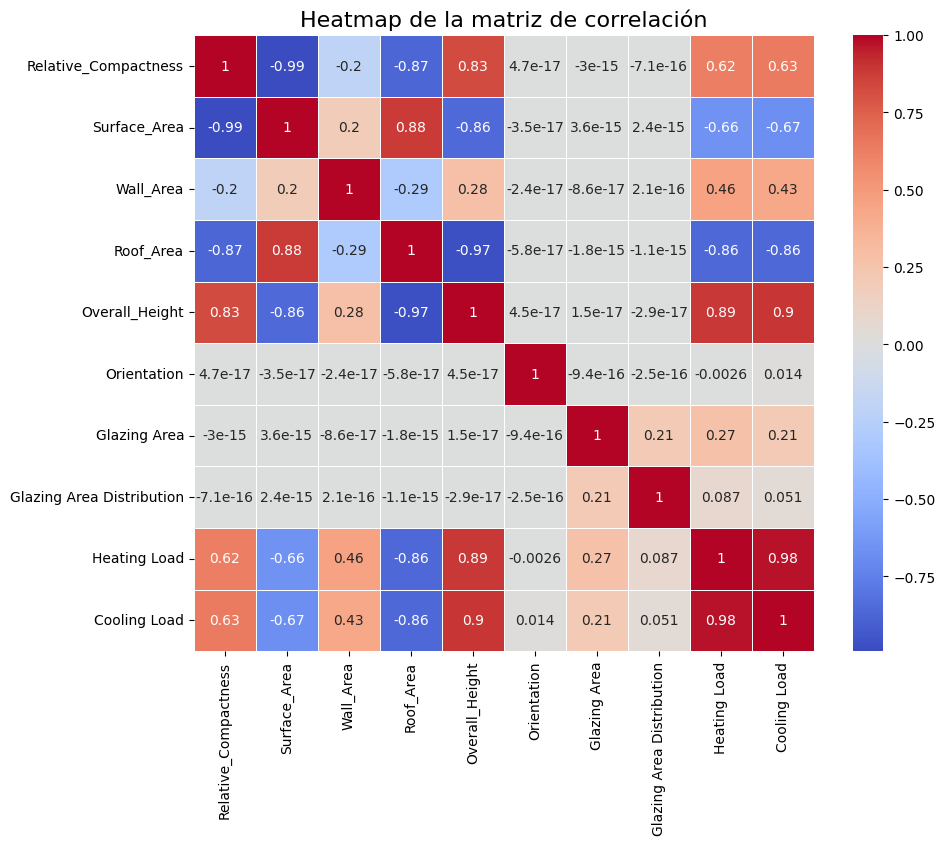

In [42]:
# 1) Definición de la función de correlación entre variables 


def heatmap (data:pd.DataFrame, method:str): 
    import seaborn as sns
    import matplotlib.pyplot as plt

    # Calcular la matriz de correlación
    correlation_matrix = data.corr(method=method)

    # Crear el heatmap
    plt.figure(figsize=(10, 8))  # Ajusta el tamaño de la figura si es necesario
    sns.heatmap(data=correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)

    # Agregar un título
    plt.title("Heatmap de la matriz de correlación", fontsize=16)

    # Mostrar el gráfico
    plt.show()
    
# 2) Ejecución de la función 
heatmap(data=dataset, method="pearson")

In [ ]:
### 2.3) 